In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
import os
import json

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 31759 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 7939 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(50,50,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomCrop(45, 45) #height, width
  ]
)

In [7]:
num_classes = 4
models = {}

In [8]:
models["CNN"] = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(50, 50, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [9]:
models["MLP"] = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(50, 50, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
for model in models.values():
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
for model in models.values():
    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 45, 45, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 45, 45, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                  

In [12]:
epochs=200
histories = {}

In [13]:
for name in models:
    print("Training "+name)
    model_path = os.path.join("saved_models/", name+".h5")
    history_path = os.path.join("saved_histories", name+".json")
    histories[name] = models[name].fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
    )
    models[name].save(model_path)
    json.dump(histories[name].history, open(history_path, 'w'))

Training CNN
Epoch 1/200
993/993 [==============================] - 20s 9ms/step - loss: 0.9601 - accuracy: 0.5654 - val_loss: 0.7332 - val_accuracy: 0.6869
Epoch 2/200
993/993 [==============================] - 7s 7ms/step - loss: 0.6738 - accuracy: 0.7235 - val_loss: 0.5741 - val_accuracy: 0.7781
Epoch 3/200
993/993 [==============================] - 7s 7ms/step - loss: 0.5602 - accuracy: 0.7758 - val_loss: 0.5553 - val_accuracy: 0.7797
Epoch 4/200
993/993 [==============================] - 7s 7ms/step - loss: 0.5025 - accuracy: 0.8059 - val_loss: 0.4770 - val_accuracy: 0.8190
Epoch 5/200
993/993 [==============================] - 7s 7ms/step - loss: 0.4647 - accuracy: 0.8209 - val_loss: 0.4856 - val_accuracy: 0.8170
Epoch 6/200
993/993 [==============================] - 7s 7ms/step - loss: 0.4351 - accuracy: 0.8341 - val_loss: 0.4119 - val_accuracy: 0.8467
Epoch 7/200
993/993 [==============================] - 7s 7ms/step - loss: 0.4098 - accuracy: 0.8431 - val_loss: 0.3862 - val_ac

Epoch 58/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2376 - accuracy: 0.9116 - val_loss: 0.2987 - val_accuracy: 0.8977
Epoch 59/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2360 - accuracy: 0.9114 - val_loss: 0.3185 - val_accuracy: 0.9007
Epoch 60/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2331 - accuracy: 0.9118 - val_loss: 0.3118 - val_accuracy: 0.8952
Epoch 61/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2341 - accuracy: 0.9111 - val_loss: 0.2973 - val_accuracy: 0.9019
Epoch 62/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2334 - accuracy: 0.9132 - val_loss: 0.3023 - val_accuracy: 0.8989
Epoch 63/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2380 - accuracy: 0.9099 - val_loss: 0.3062 - val_accuracy: 0.9005
Epoch 64/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2369 - accuracy: 0.9110 - val_loss: 0.2955 - val_accuracy:

Epoch 115/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2108 - accuracy: 0.9210 - val_loss: 0.3038 - val_accuracy: 0.9025
Epoch 116/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2076 - accuracy: 0.9206 - val_loss: 0.3012 - val_accuracy: 0.9035
Epoch 117/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2059 - accuracy: 0.9225 - val_loss: 0.3073 - val_accuracy: 0.9036
Epoch 118/200
993/993 [==============================] - 8s 8ms/step - loss: 0.2075 - accuracy: 0.9209 - val_loss: 0.2997 - val_accuracy: 0.9018
Epoch 119/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1998 - accuracy: 0.9239 - val_loss: 0.3137 - val_accuracy: 0.8995
Epoch 120/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2015 - accuracy: 0.9238 - val_loss: 0.2918 - val_accuracy: 0.9063
Epoch 121/200
993/993 [==============================] - 7s 7ms/step - loss: 0.2014 - accuracy: 0.9255 - val_loss: 0.3319 - val_ac

993/993 [==============================] - 7s 7ms/step - loss: 0.1890 - accuracy: 0.9281 - val_loss: 0.3197 - val_accuracy: 0.9031
Epoch 172/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1862 - accuracy: 0.9292 - val_loss: 0.3089 - val_accuracy: 0.9055
Epoch 173/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1898 - accuracy: 0.9270 - val_loss: 0.3220 - val_accuracy: 0.8999
Epoch 174/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1903 - accuracy: 0.9271 - val_loss: 0.3064 - val_accuracy: 0.9083
Epoch 175/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1905 - accuracy: 0.9281 - val_loss: 0.3146 - val_accuracy: 0.9073
Epoch 176/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1882 - accuracy: 0.9284 - val_loss: 0.3058 - val_accuracy: 0.9028
Epoch 177/200
993/993 [==============================] - 7s 7ms/step - loss: 0.1852 - accuracy: 0.9300 - val_loss: 0.2993 - val_accuracy: 0.9060

Epoch 28/200
993/993 [==============================] - 5s 5ms/step - loss: 1.4074 - accuracy: 0.2493 - val_loss: 1.3865 - val_accuracy: 0.2470
Epoch 29/200
993/993 [==============================] - 6s 6ms/step - loss: 1.3864 - accuracy: 0.2475 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 30/200
993/993 [==============================] - 5s 5ms/step - loss: 1.4849 - accuracy: 0.2520 - val_loss: 1.3862 - val_accuracy: 0.2539
Epoch 31/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2511 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 32/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2486 - val_loss: 1.3865 - val_accuracy: 0.2422
Epoch 33/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2491 - val_loss: 1.3863 - val_accuracy: 0.2568
Epoch 34/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3866 - accuracy: 0.2521 - val_loss: 1.3866 - val_accuracy:

Epoch 85/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2496 - val_loss: 1.3865 - val_accuracy: 0.2422
Epoch 86/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2499 - val_loss: 1.3864 - val_accuracy: 0.2422
Epoch 87/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2495 - val_loss: 1.3864 - val_accuracy: 0.2422
Epoch 88/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2499 - val_loss: 1.3867 - val_accuracy: 0.2470
Epoch 89/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2482 - val_loss: 1.3866 - val_accuracy: 0.2470
Epoch 90/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3863 - accuracy: 0.2482 - val_loss: 1.3863 - val_accuracy: 0.2422
Epoch 91/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3863 - accuracy: 0.2525 - val_loss: 1.3863 - val_accuracy:

993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2510 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 142/200
993/993 [==============================] - 5s 6ms/step - loss: 1.3864 - accuracy: 0.2523 - val_loss: 1.3867 - val_accuracy: 0.2422
Epoch 143/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2515 - val_loss: 1.3867 - val_accuracy: 0.2422
Epoch 144/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2512 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 145/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2485 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 146/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2535 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 147/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2497 - val_loss: 1.3865 - val_accuracy: 0.2539

993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2505 - val_loss: 1.3867 - val_accuracy: 0.2422
Epoch 198/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2488 - val_loss: 1.3863 - val_accuracy: 0.2539
Epoch 199/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3864 - accuracy: 0.2480 - val_loss: 1.3864 - val_accuracy: 0.2422
Epoch 200/200
993/993 [==============================] - 5s 5ms/step - loss: 1.3863 - accuracy: 0.2527 - val_loss: 1.3865 - val_accuracy: 0.2470


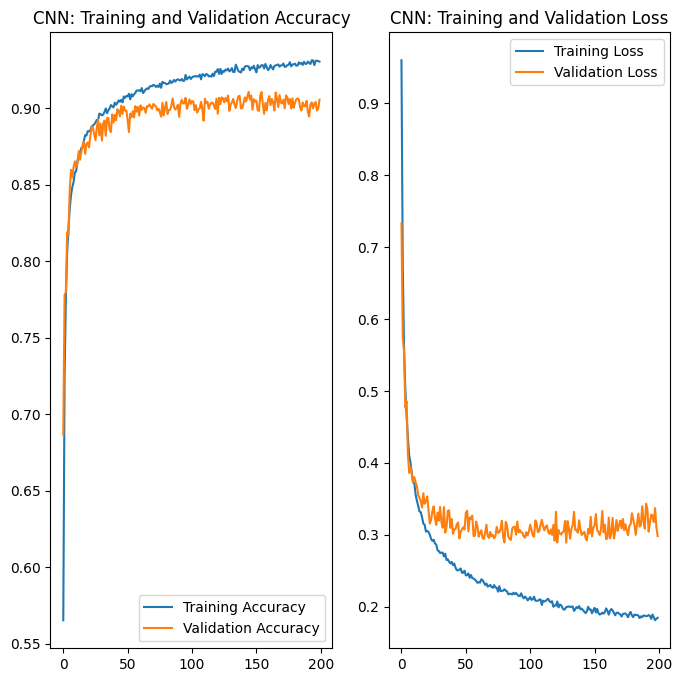

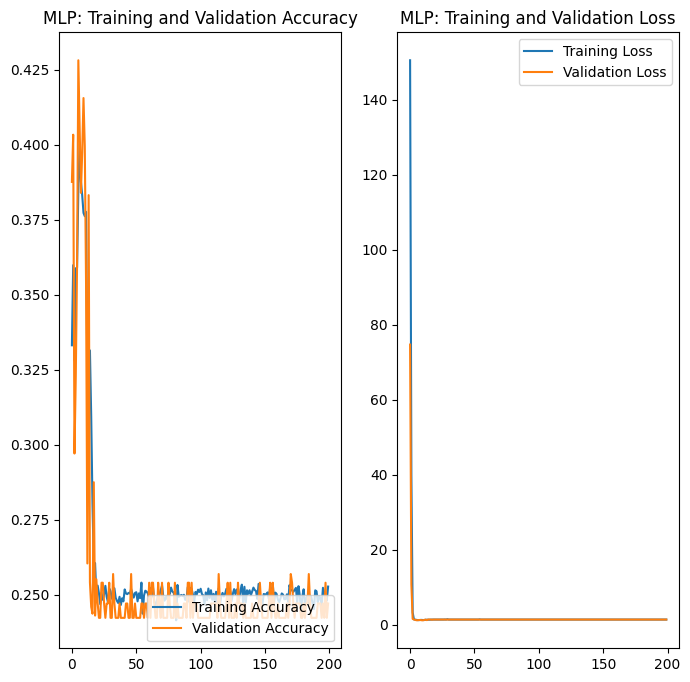

In [14]:
for name in histories:
    history = histories[name]
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    pyplot.figure(figsize=(8, 8))
    pyplot.subplot(1, 2, 1)
    pyplot.plot(epochs_range, acc, label='Training Accuracy')
    pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
    pyplot.legend(loc='lower right')
    pyplot.title(name+': Training and Validation Accuracy')

    pyplot.subplot(1, 2, 2)
    pyplot.plot(epochs_range, loss, label='Training Loss')
    pyplot.plot(epochs_range, val_loss, label='Validation Loss')
    pyplot.legend(loc='upper right')
    pyplot.title(name+': Training and Validation Loss')
    pyplot.show()

In [15]:
class_names = ["Access Granted", "Access Denied - Please wear a mask over your nose.", "Access Denied - Please wear a mask over your mouth and nose.", "Access Denied - Please wear a mask"]

In [16]:
def predict(file_path):
    
    img = tf.keras.utils.load_img(file_path, target_size=(50, 50))
    pyplot.imshow(img)

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    for name in models:
        model = models[name]
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])


        print(
            "{} predicts {} ({:.2f}% confidence)"
            .format(name, class_names[np.argmax(score)], 100 * np.max(score))
        )
    pyplot.show()
        


CNN predicts Access Denied - Please wear a mask (72.15% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


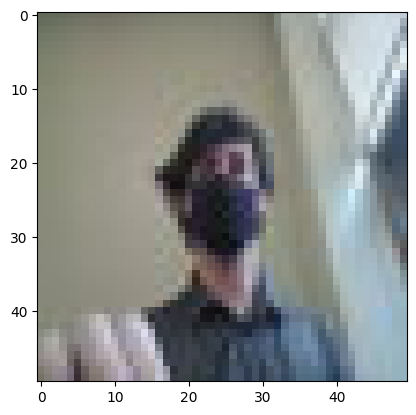

In [17]:
predict("faces/benjamin/1.jpg")

CNN predicts Access Denied - Please wear a mask over your nose. (43.48% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


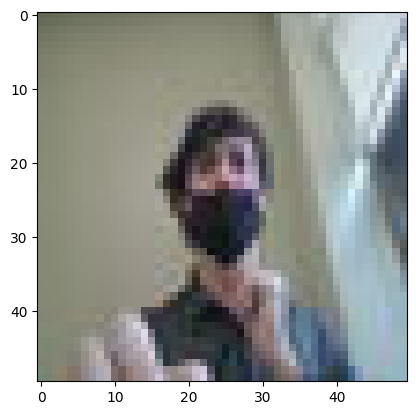

In [18]:
predict("faces/benjamin/2.jpg")

CNN predicts Access Granted (52.21% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


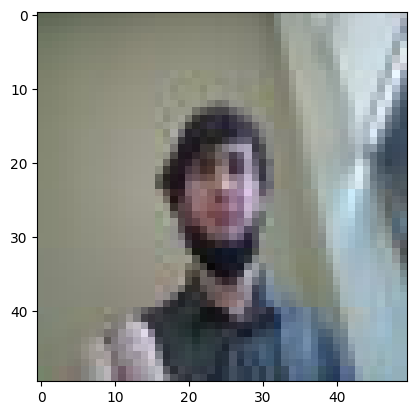

In [19]:
predict("faces/benjamin/3.jpg")

CNN predicts Access Denied - Please wear a mask (66.47% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


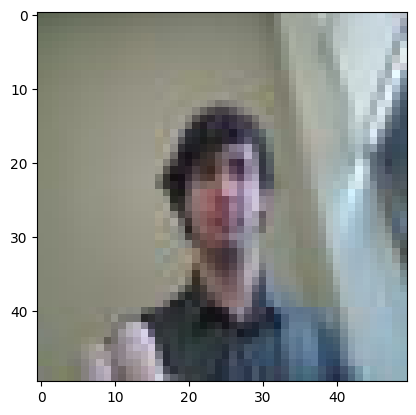

In [20]:
predict("faces/benjamin/4.jpg")

CNN predicts Access Granted (99.97% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


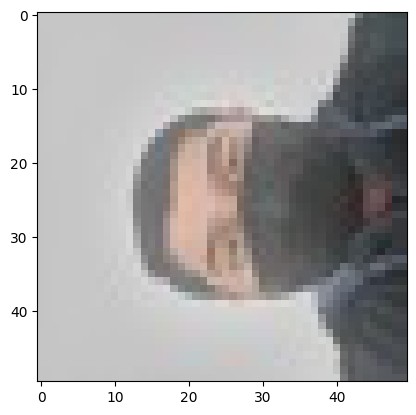

In [21]:
predict("faces/shaurya/1.jpg")

CNN predicts Access Denied - Please wear a mask over your nose. (99.49% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


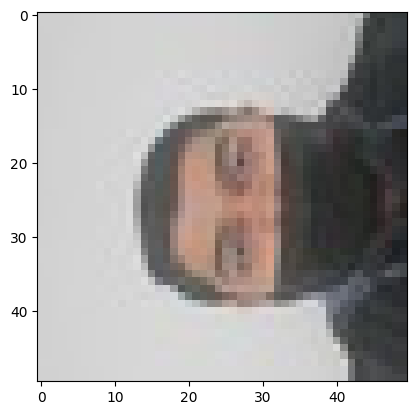

In [22]:
predict("faces/shaurya/2.jpg")

CNN predicts Access Denied - Please wear a mask over your mouth and nose. (73.27% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


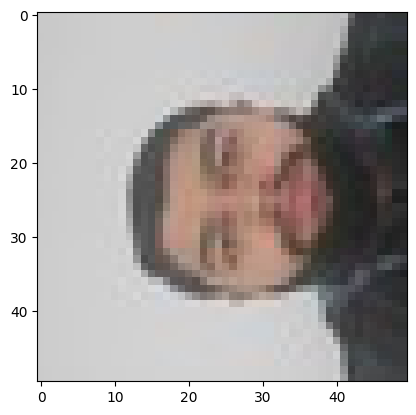

In [23]:
predict("faces/shaurya/3.jpg")

CNN predicts Access Denied - Please wear a mask (64.43% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


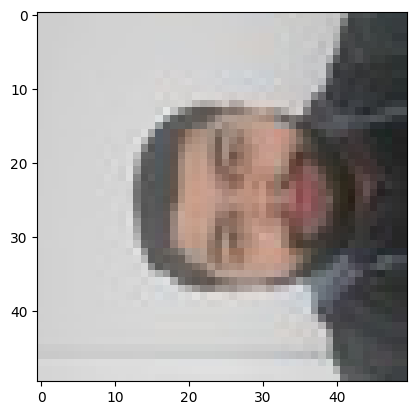

In [24]:
predict("faces/shaurya/4.jpg")

CNN predicts Access Granted (92.44% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


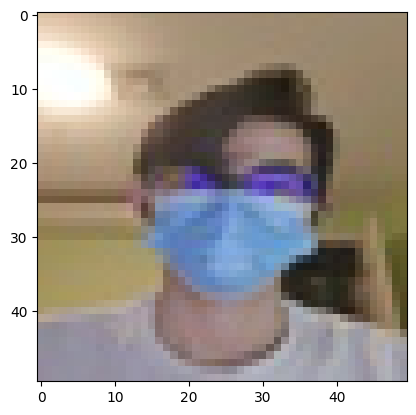

In [25]:
predict("faces/zunyi/1.jpg")

CNN predicts Access Denied - Please wear a mask over your nose. (99.99% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


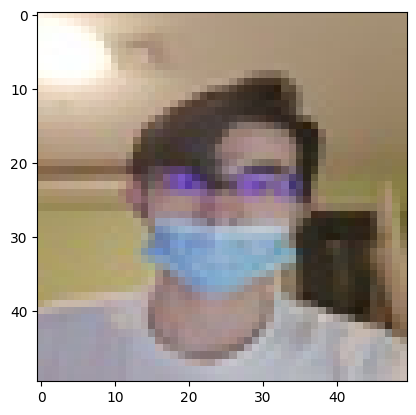

In [26]:
predict("faces/zunyi/2.jpg")

CNN predicts Access Denied - Please wear a mask over your mouth and nose. (98.28% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


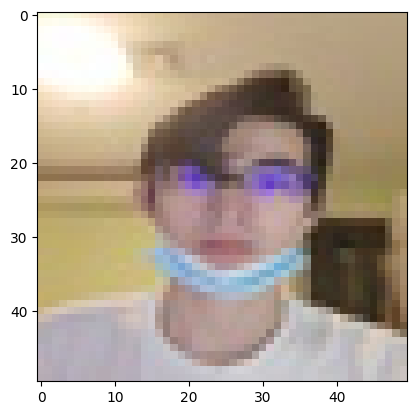

In [27]:
predict("faces/zunyi/3.jpg")

CNN predicts Access Denied - Please wear a mask (94.19% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


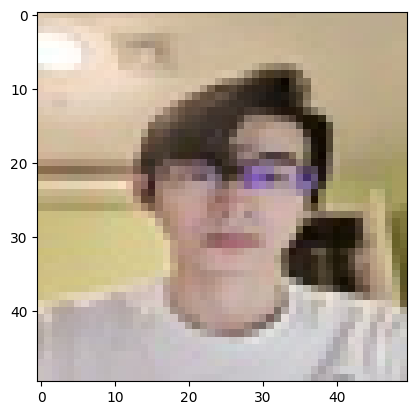

In [28]:
predict("faces/zunyi/4.jpg")

CNN predicts Access Denied - Please wear a mask (99.91% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


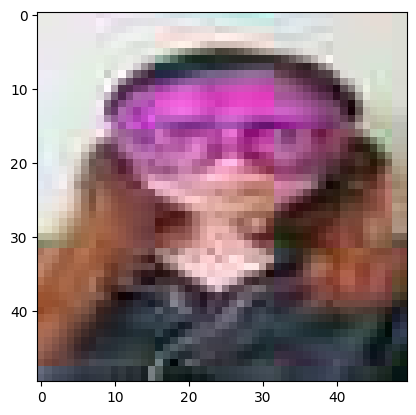

In [29]:
predict("faces/parisa/1.jpg")

CNN predicts Access Denied - Please wear a mask (99.90% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


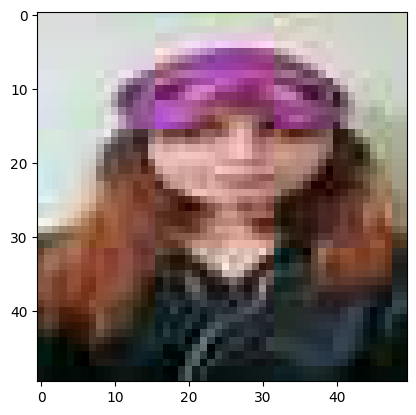

In [30]:
predict("faces/parisa/2.jpg")

CNN predicts Access Granted (99.92% confidence)
MLP predicts Access Denied - Please wear a mask over your mouth and nose. (25.18% confidence)


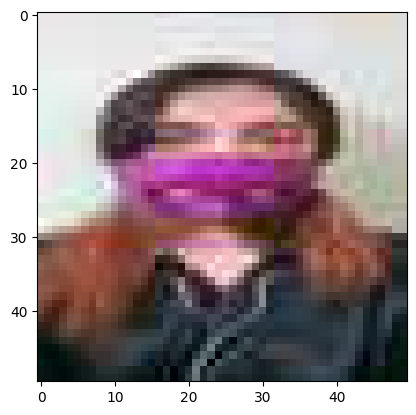

In [31]:
predict("faces/parisa/3.jpg")

## Source: https://www.tensorflow.org/tutorials/images/classification